In [2]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import time
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np
import torch
from torch.autograd import Variable
import torch.nn as nn
from torch.utils.data import sampler
import torchvision.models as models
import math
import torch.nn as nn
import torch.nn.init as init
import torch.utils.model_zoo as model_zoo

# local libraries
import Prune_utils as util
import models

%matplotlib nbagg

Load and process CIFAR 10 data

In [3]:
#from pytorch tutorial
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

normalize = transforms.Normalize(mean=[0.485, 0.456, 0.406],
                                 std=[0.229, 0.224, 0.225])

Files already downloaded and verified
Files already downloaded and verified


Look at example CIFAR images

<IPython.core.display.Javascript object>


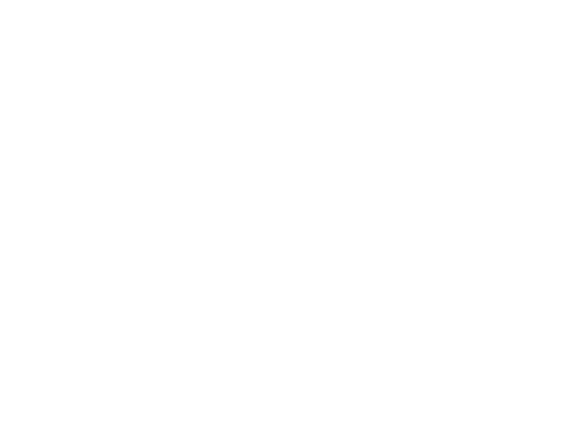

plane   cat   car truck


Process Process-1:
Process Process-2:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
    self._target(*self._args, **self._kwargs)
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python2.7/dist-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
  File "/usr/local/lib/python2.7/dist-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python2.7/multiprocessing/queues.py", line 131, in get
  File "/usr/lib/python2.7/multiprocessing/queues.py", l

In [4]:
#from pytorch tutorial
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))

# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

Define wrappers for masking out weights

modify pretrain weights to be compatible with my model

In [5]:
w = torch.load("Models/model_best.pth.tar")
w = w['state_dict']
for key in w.keys()[:32]:
    new_key = key.split(".")
    nkey = new_key[0]+'.'+new_key[2]+'.'+new_key[3]
    w[nkey] = w[key]
    del w[key]
w['classifier.0.weight'] =w['classifier.1.weight']
w['classifier.0.bias'] = w['classifier.1.bias']
w['classifier.3.weight'] = w['classifier.4.weight']
w['classifier.3.bias'] = w['classifier.4.bias']
del w['classifier.1.bias']
del w['classifier.4.bias']
del w['classifier.1.weight']
del w['classifier.4.weight']

load vgg model

In [6]:
vgg_model = models.vgg19()
vgg_model.load_state_dict(w)
vgg_model = vgg_model.cuda()
import copy
model = copy.deepcopy(vgg_model)

or load Knowledge distillation model

In [7]:
model_ini = models.DeepConvNet()
st = torch.load("../KD/models/distill_best.tar")
model_ini.load_state_dict(st['state_dict'])
model_ini = model_ini.cuda()

see pretrained accuracy

In [8]:
util.test(model,testloader)

Prune_utils.py:41: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  return Variable(x, requires_grad=requires_grad, volatile=volatile)


Test accuracy: 80.70% (8070/10000)


0.807

In [9]:
prune = util.PruneWrapSparse(0,model,0,.75,100,500,trainloader)

In [10]:
print prune.calculate_current_model_size()
print prune.calculate_current_model_inference_time(10)

model sparsity:  0.0
657754432


Exception OSError: OSError(4, 'Interrupted system call') in <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f9dc6346b90>> ignored
Exception OSError: OSError(4, 'Interrupted system call') in <bound method _DataLoaderIter.__del__ of <torch.utils.data.dataloader._DataLoaderIter object at 0x7f9dc62f5cd0>> ignored


Time elapsed:0.00311131477356
None


In [11]:
prune.train()

training
current sparsity: 0
sparsity target: 0.75
initial sparsity: 0
current train step: 0
prune steps: 100
prunning rate: 500
None
epoch:  0
0
0
0.0
0.0
current sparsity: 0
sparsity target: 0.75
initial sparsity: 0
current train step: 0
prune steps: 100
prunning rate: 500
None
Layer 1 | Conv layer | 0.06% parameters pruned
Layer 2 | Conv layer | 0.00% parameters pruned
Layer 3 | Conv layer | 0.00% parameters pruned
Layer 4 | Conv layer | 0.00% parameters pruned
Layer 5 | Conv layer | 0.00% parameters pruned
Layer 6 | Conv layer | 0.00% parameters pruned
Layer 7 | Conv layer | 0.00% parameters pruned
Layer 8 | Conv layer | 0.00% parameters pruned
Layer 9 | Conv layer | 0.00% parameters pruned
Layer 10 | Conv layer | 0.00% parameters pruned
Layer 11 | Conv layer | 0.00% parameters pruned
Layer 12 | Conv layer | 0.00% parameters pruned
Layer 13 | Conv layer | 0.00% parameters pruned
Layer 14 | Conv layer | 0.00% parameters pruned
Layer 15 | Conv layer | 0.00% parameters pruned
Layer 16

Prune_utils.py:176: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  self.running_loss+=loss.data[0]
Prune_utils.py:178: UserWarning: invalid index of a 0-dim tensor. This will be an error in PyTorch 0.5. Use tensor.item() to convert a 0-dim tensor to a Python number
  self.train1+=loss.data[0]


500
tensor(0.1417, device='cuda:0')
0.02227575
current sparsity: 0.0
sparsity target: 0.75
initial sparsity: 0
current train step: 500
prune steps: 100
prunning rate: 500
None
Layer 1 | Conv layer | 2.26% parameters pruned
Layer 2 | Conv layer | 2.23% parameters pruned
Layer 3 | Conv layer | 2.23% parameters pruned
Layer 4 | Conv layer | 2.23% parameters pruned
Layer 5 | Conv layer | 2.23% parameters pruned
Layer 6 | Conv layer | 2.23% parameters pruned
Layer 7 | Conv layer | 2.23% parameters pruned
Layer 8 | Conv layer | 2.23% parameters pruned
Layer 9 | Conv layer | 2.23% parameters pruned
Layer 10 | Conv layer | 2.23% parameters pruned
Layer 11 | Conv layer | 2.23% parameters pruned
Layer 12 | Conv layer | 2.23% parameters pruned
Layer 13 | Conv layer | 2.23% parameters pruned
Layer 14 | Conv layer | 2.23% parameters pruned
Layer 15 | Conv layer | 2.23% parameters pruned
Layer 16 | Conv layer | 2.23% parameters pruned
Layer 17 | Linear layer | 2.23% parameters pruned
Layer 18 | Line

  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
Process Process-25:
Process Process-26:
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
  File "/usr/lib/python2.7/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
    self.run()
    self._target(*self._args, **self._kwargs)
  File "/usr/lib/python2.7/multiprocessing/process.py", line 114, in run
  File "/usr/local/lib/python2.7/dist-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python2.7/dist-packages/torch/utils/data/dataloader.py", line 96, in _worker_loop
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
  File "/usr/lib/python2.7/multiprocessing/queues.py", line 131, in get
    r = index_queue.get(timeout=MANAGER_STATUS_CHECK_INTERVAL)
    if timeout < 0 or not self._poll(timeout):
    if 

Traceback (most recent call last):
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 1132, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_context, tb_offset)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 313, in wrapped
    return f(*args, **kwargs)
  File "/usr/local/lib/python2.7/dist-packages/IPython/core/ultratb.py", line 376, in _fixed_getinnerframes
    lines = ulinecache.getlines(file)[start:end]
  File "/usr/local/lib/python2.7/dist-packages/IPython/utils/ulinecache.py", line 37, in getlines
    return [l.decode(encoding, 'replace') for l in lines]
  File "/usr/lib/python2.7/encodings/utf_8.py", line 16, in decode
    return codecs.utf_8_decode(input, errors, True)
  File "/usr/local/lib/python2.7/dist-packages/torch/utils/data/dataloader.py", line 227, in handler
    _error_if_any_worker_fails()
RuntimeError: DataLoader worker (pid 26565) exited unexpectedly with exit code 1.


IndexError: string index out of range

In [12]:
print prune.calculate_current_model_size()
print prune.calculate_current_model_inference_time(10)

model sparsity:  0.002166401214
656329472
Time elapsed:0.00425901412964
None


In [ ]:
torch.save(model_ini.state_dict(), 'KD_prunning_40%.pkl')

In [75]:
test(model_ini,testloader)

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:8: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  


Test accuracy: 89.29% (8929/10000)


0.8929

In [60]:
prune_rate(model)

Layer 1 | Conv layer | 87.83% parameters pruned
Layer 2 | Conv layer | 87.62% parameters pruned
Layer 3 | Conv layer | 87.50% parameters pruned
Layer 4 | Conv layer | 87.50% parameters pruned
Layer 5 | Conv layer | 87.54% parameters pruned
Layer 6 | Conv layer | 87.58% parameters pruned
Layer 7 | Conv layer | 87.51% parameters pruned
Layer 8 | Conv layer | 87.46% parameters pruned
Layer 9 | Conv layer | 87.40% parameters pruned
Final pruning rate: 87.39%


87.38854543912736

# model parameter histogram

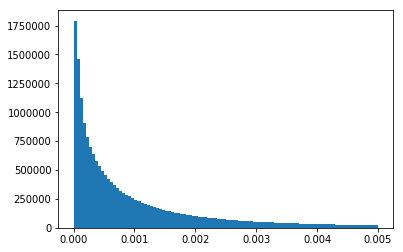

In [358]:
params = []
plt.figure()
for p in model.parameters():
    params.extend(list(p.data.cpu().abs().numpy().flatten()))
plt.hist(params,bins=100,range=[0, .0050])
plt.show()
        

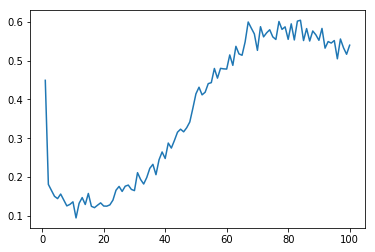

In [67]:
%matplotlib inline
plt.figure()
plt.plot(range(len(prune1.loss_over_time))[1:],prune1.loss_over_time[1:])

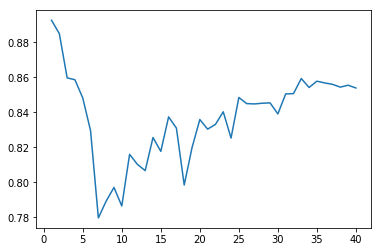

In [64]:
%matplotlib inline
plt.figure()
plt.plot(range(len(prune1.epoch))[1:],prune1.epoch[1:])

# Random Tests and expriments

In [141]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model1.parameters(), lr=0.001, momentum=0.9)

In [142]:
def prune(model,target):#all conv layers for now
        for seq in list(model.children()):
            for layer in seq:
                if isinstance(layer, MaskedLinear) or isinstance(layer, MaskedConv2d):
                    #find weight threshold for layer
                    weight_threshold = get_weight_threshold(layer.parameters(),target) 
                    #set mask
                    mask = get_prune_mask(layer,weight_threshold)
                    #prune
                    layer.set_mask(mask)
        
def get_prune_mask(layer,threshold):
        # generate mask
        p=layer.weight.data.abs()
        pruned_inds = p > threshold
        return pruned_inds.float()

        
def get_weight_threshold(params,percent_to_prune):
        weights=[]
        for param in params:
            if len(list(param.cpu().data.abs().numpy().flatten()))>1:
                weights.extend(list(param.cpu().data.abs().numpy().flatten()))
        threshold = np.percentile(np.array(weights),percent_to_prune*100)
        #print len(np.nonzero(np.array(weights)))/float(len(weights))
        return threshold
    
test(model1,testloader)

# prune the weights
prune(model1,.75)
test(model1, testloader)

Test accuracy: 80.70% (8070/10000)
Test accuracy: 64.71% (6471/10000)


0.6471

In [144]:
losses=[]


for epoch in range(10):  # loop over the dataset multiple times
    running_loss = 0.0
    for t, (x, y) in enumerate(trainloader):
        inputs, labels = to_var(x), to_var(y.long())
        
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = model1(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if t % 1000 == 0:
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, t + 1, running_loss / 1000.))
            losses.append(running_loss/1000.)
            running_loss = 0.0

print('Finished Training')


#torch.save(net.state_dict(), 'vgg_pruned.pkl')

[1,     1] loss: 0.000
[1,  1001] loss: 0.842
[1,  2001] loss: 0.568
[1,  3001] loss: 0.510
[1,  4001] loss: 0.446
[1,  5001] loss: 0.424
[1,  6001] loss: 0.371
[1,  7001] loss: 0.381
[1,  8001] loss: 0.340
[1,  9001] loss: 0.344
[1, 10001] loss: 0.330
[1, 11001] loss: 0.321
[1, 12001] loss: 0.303
[2,     1] loss: 0.000
[2,  1001] loss: 0.202
[2,  2001] loss: 0.246
[2,  3001] loss: 0.245
[2,  4001] loss: 0.214
[2,  5001] loss: 0.225
[2,  6001] loss: 0.224
[2,  7001] loss: 0.208
[2,  8001] loss: 0.207
[2,  9001] loss: 0.186
[2, 10001] loss: 0.194
[2, 11001] loss: 0.224
[2, 12001] loss: 0.225
[3,     1] loss: 0.000
[3,  1001] loss: 0.139
[3,  2001] loss: 0.130
[3,  3001] loss: 0.137
[3,  4001] loss: 0.150
[3,  5001] loss: 0.141
[3,  6001] loss: 0.196
[3,  7001] loss: 0.141
[3,  8001] loss: 0.169
[3,  9001] loss: 0.166
[3, 10001] loss: 0.152
[3, 11001] loss: 0.145
[3, 12001] loss: 0.156
[4,     1] loss: 0.000
[4,  1001] loss: 0.100
[4,  2001] loss: 0.095
[4,  3001] loss: 0.112
[4,  4001] 

## look at test resullts by class

In [ ]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))
model = model.float()
for data in testloader:
    images, labels = data
    images, labels = to_var(images),labels
    outputs = vgg_model(images)
    _, predicted = torch.max(outputs.data, 1)
    c = (predicted.cpu().numpy() == labels.numpy()).squeeze()
    for i in range(4):
        label = labels[i]
        class_correct[label] += c[i]
        class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))


## Visualize Kernals

In [ ]:
def plot_kernels(tensor, num_cols=6):
    if not tensor.ndim==4:
        raise Exception("assumes a 4D tensor")
    if not tensor.shape[-1]==3:
        raise Exception("last dim needs to be 3 to plot")
    num_kernels = tensor.shape[0]
    num_rows = 1+ num_kernels // num_cols
    fig = plt.figure(figsize=(num_cols,num_rows))
    for i in range(tensor.shape[0]):
        ax1 = fig.add_subplot(num_rows,num_cols,i+1)
        ax1.imshow(tensor[i])
        ax1.axis('off')
        ax1.set_xticklabels([])
        ax1.set_yticklabels([])

    plt.subplots_adjust(wspace=0.1, hspace=0.1)
    plt.show()
    
mm = model.cuda().double()
filters = mm.modules
layers=np.zeros((3,3))
body_model = [i for i in mm.children()][0]
for i in body_model:
    if isinstance(i,MaskedConv2d):
        tensor = i.weight.cpu().data.numpy()
        shape = np.shape(tensor)
        layers+=np.sum(np.sum(tensor,axis=0),axis=0)
print layers
plt.figure()
plt.imshow(tensor[0][0])